Name: Dohyun Kim

Student number: 1007372843

# Part 1

In [6]:
import pymc as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az

data = pd.read_csv('apple_quality.csv')
data = data.dropna()
y = data[['Quality']]
y['Class'] = np.where(y['Quality'] == 'good', '1', '0')
x = data[['Size']]

4000 4000


/tmp/ipykernel_3775/3139480649.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'] = np.where(y['Quality'] == 'good', '1', '0')


In [4]:
with pm.Model() as BLR:
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=2)
    p = pm.Deterministic('p', pm.math.invlogit(pm.math.dot(x['Size'], beta) + intercept))
    y = pm.Bernoulli('y', p=p, observed=y['Class'])

    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

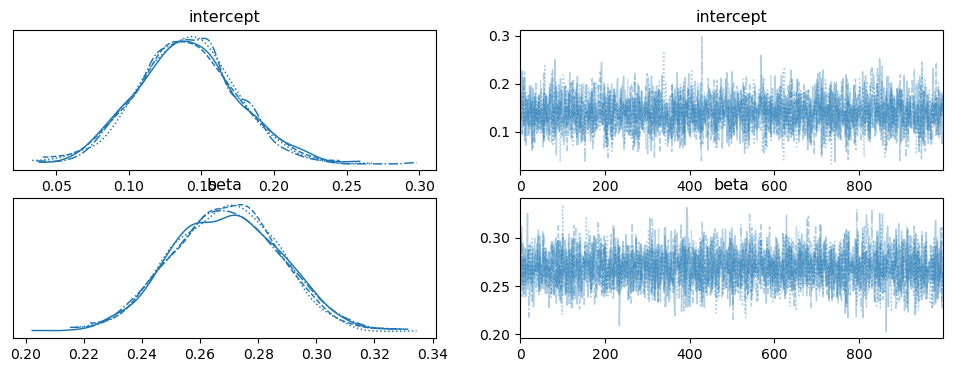

In [26]:
az.plot_trace(idata, var_names=["intercept", "beta"])

# Part 2

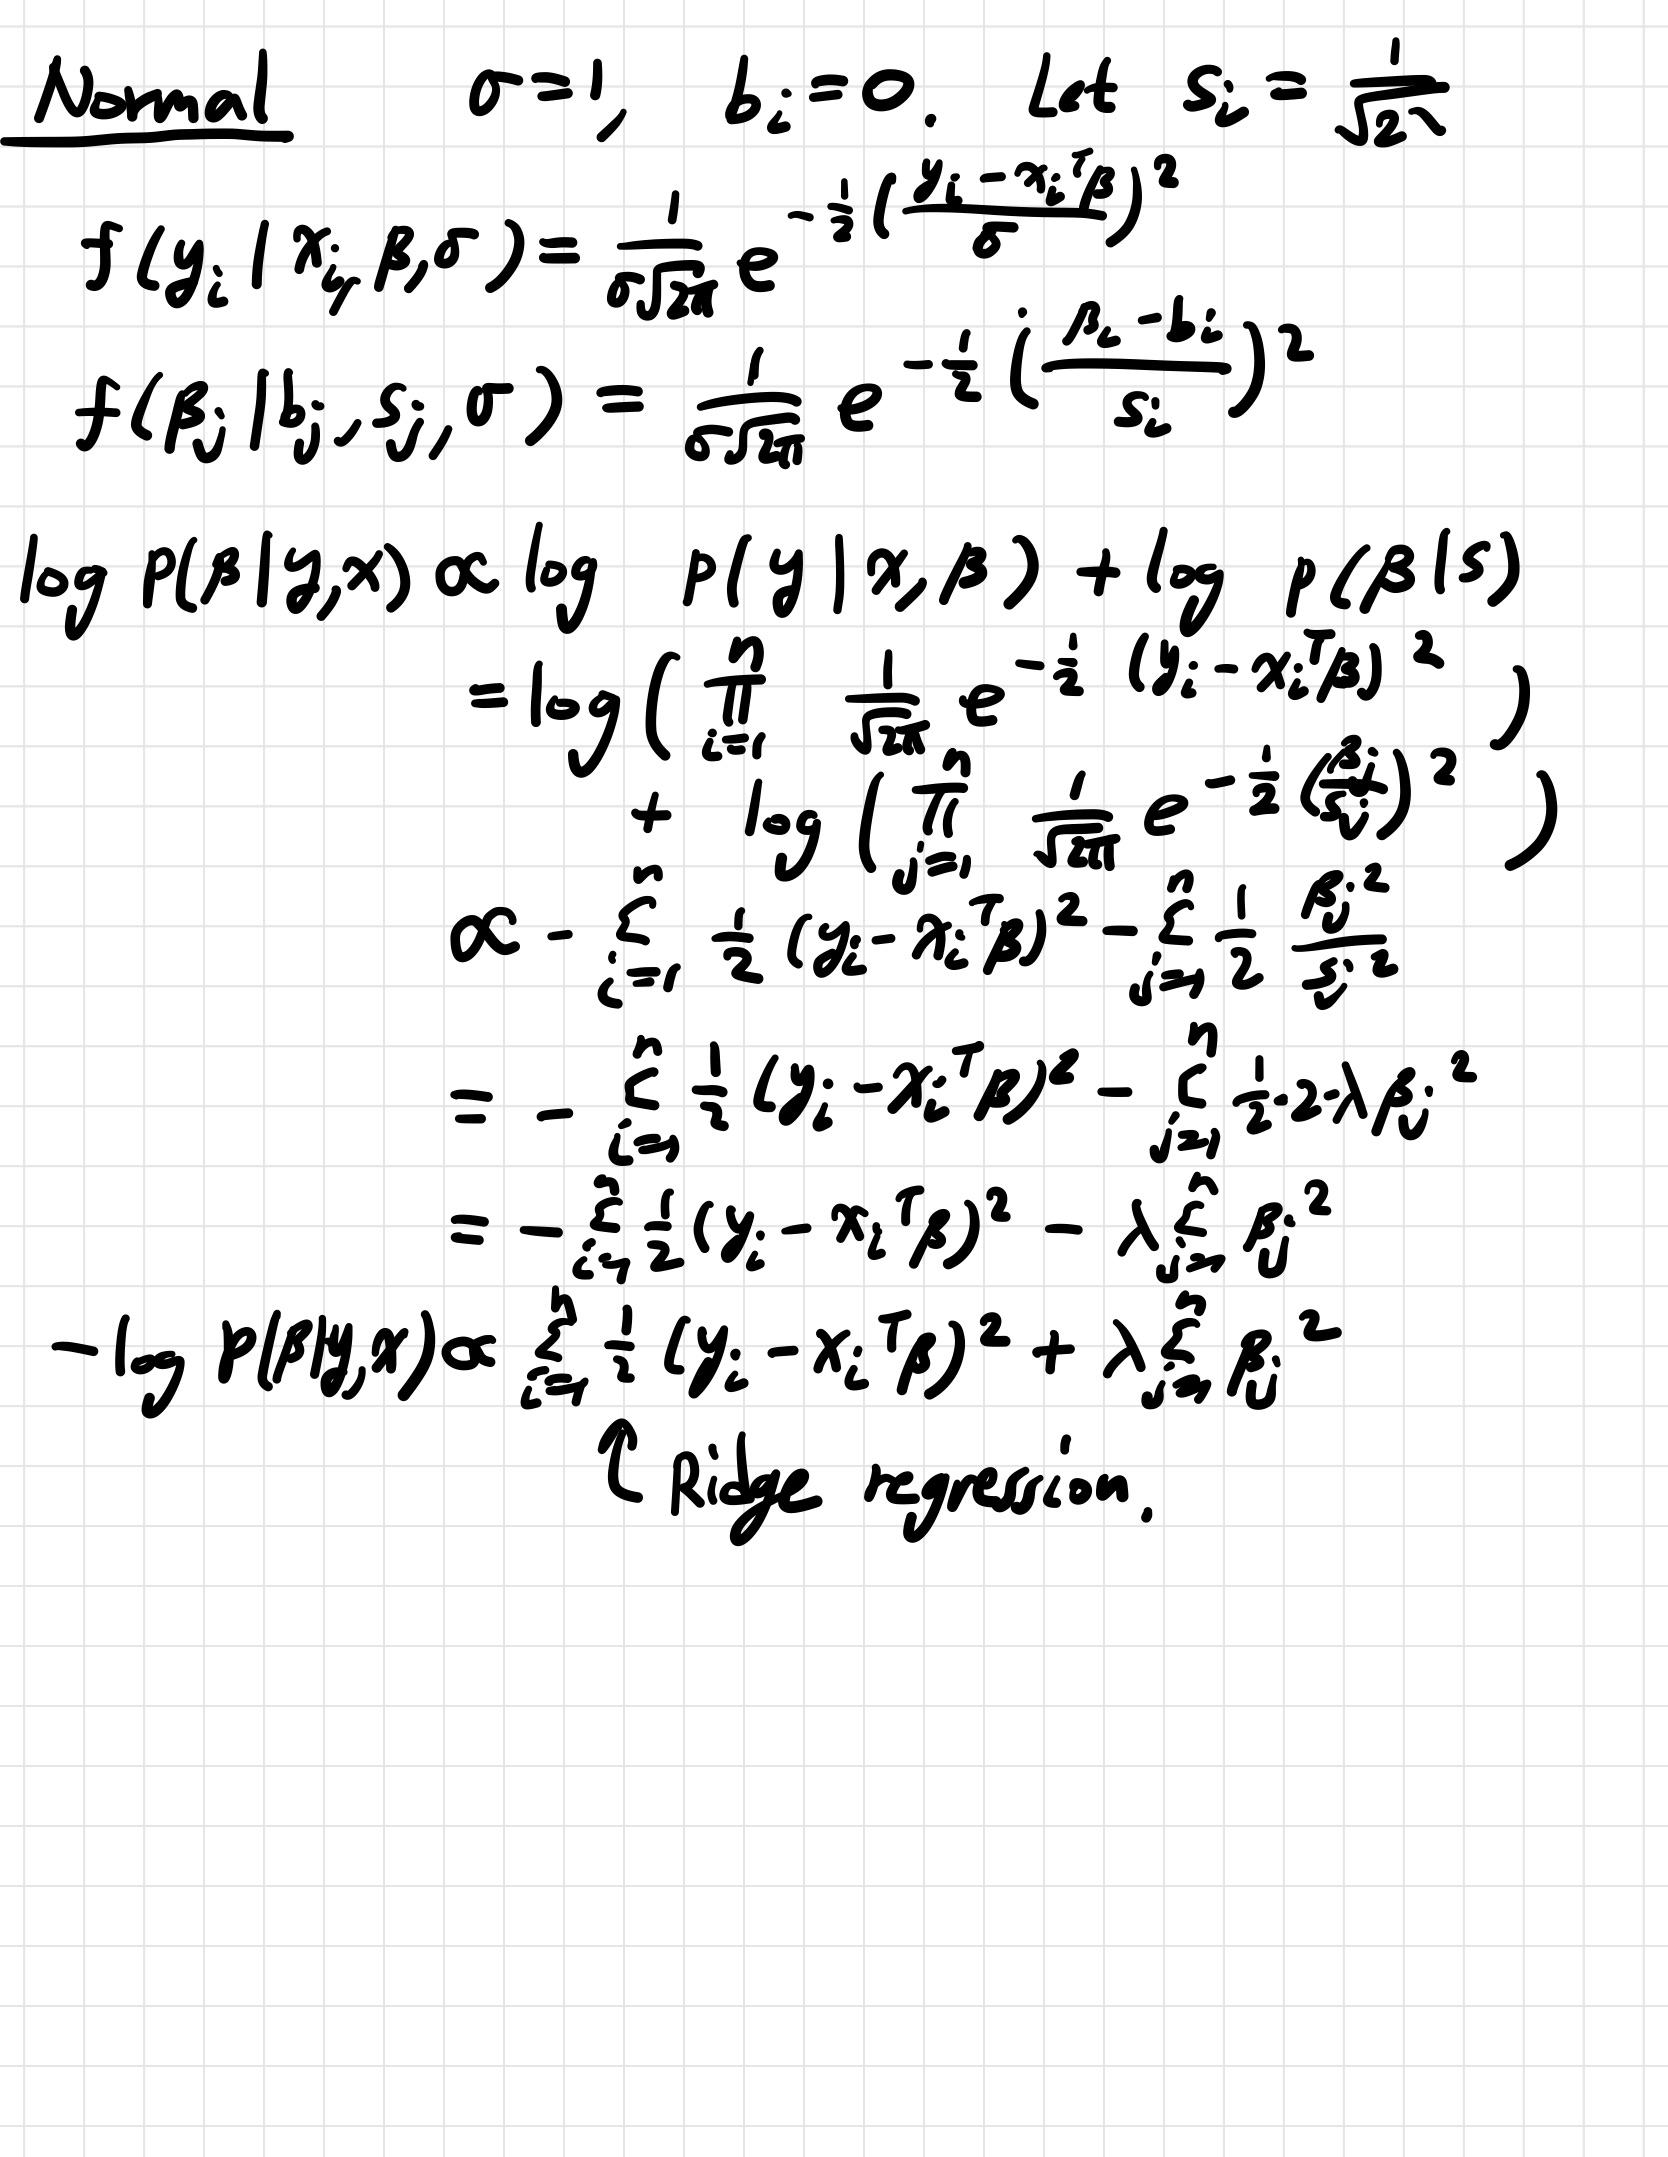

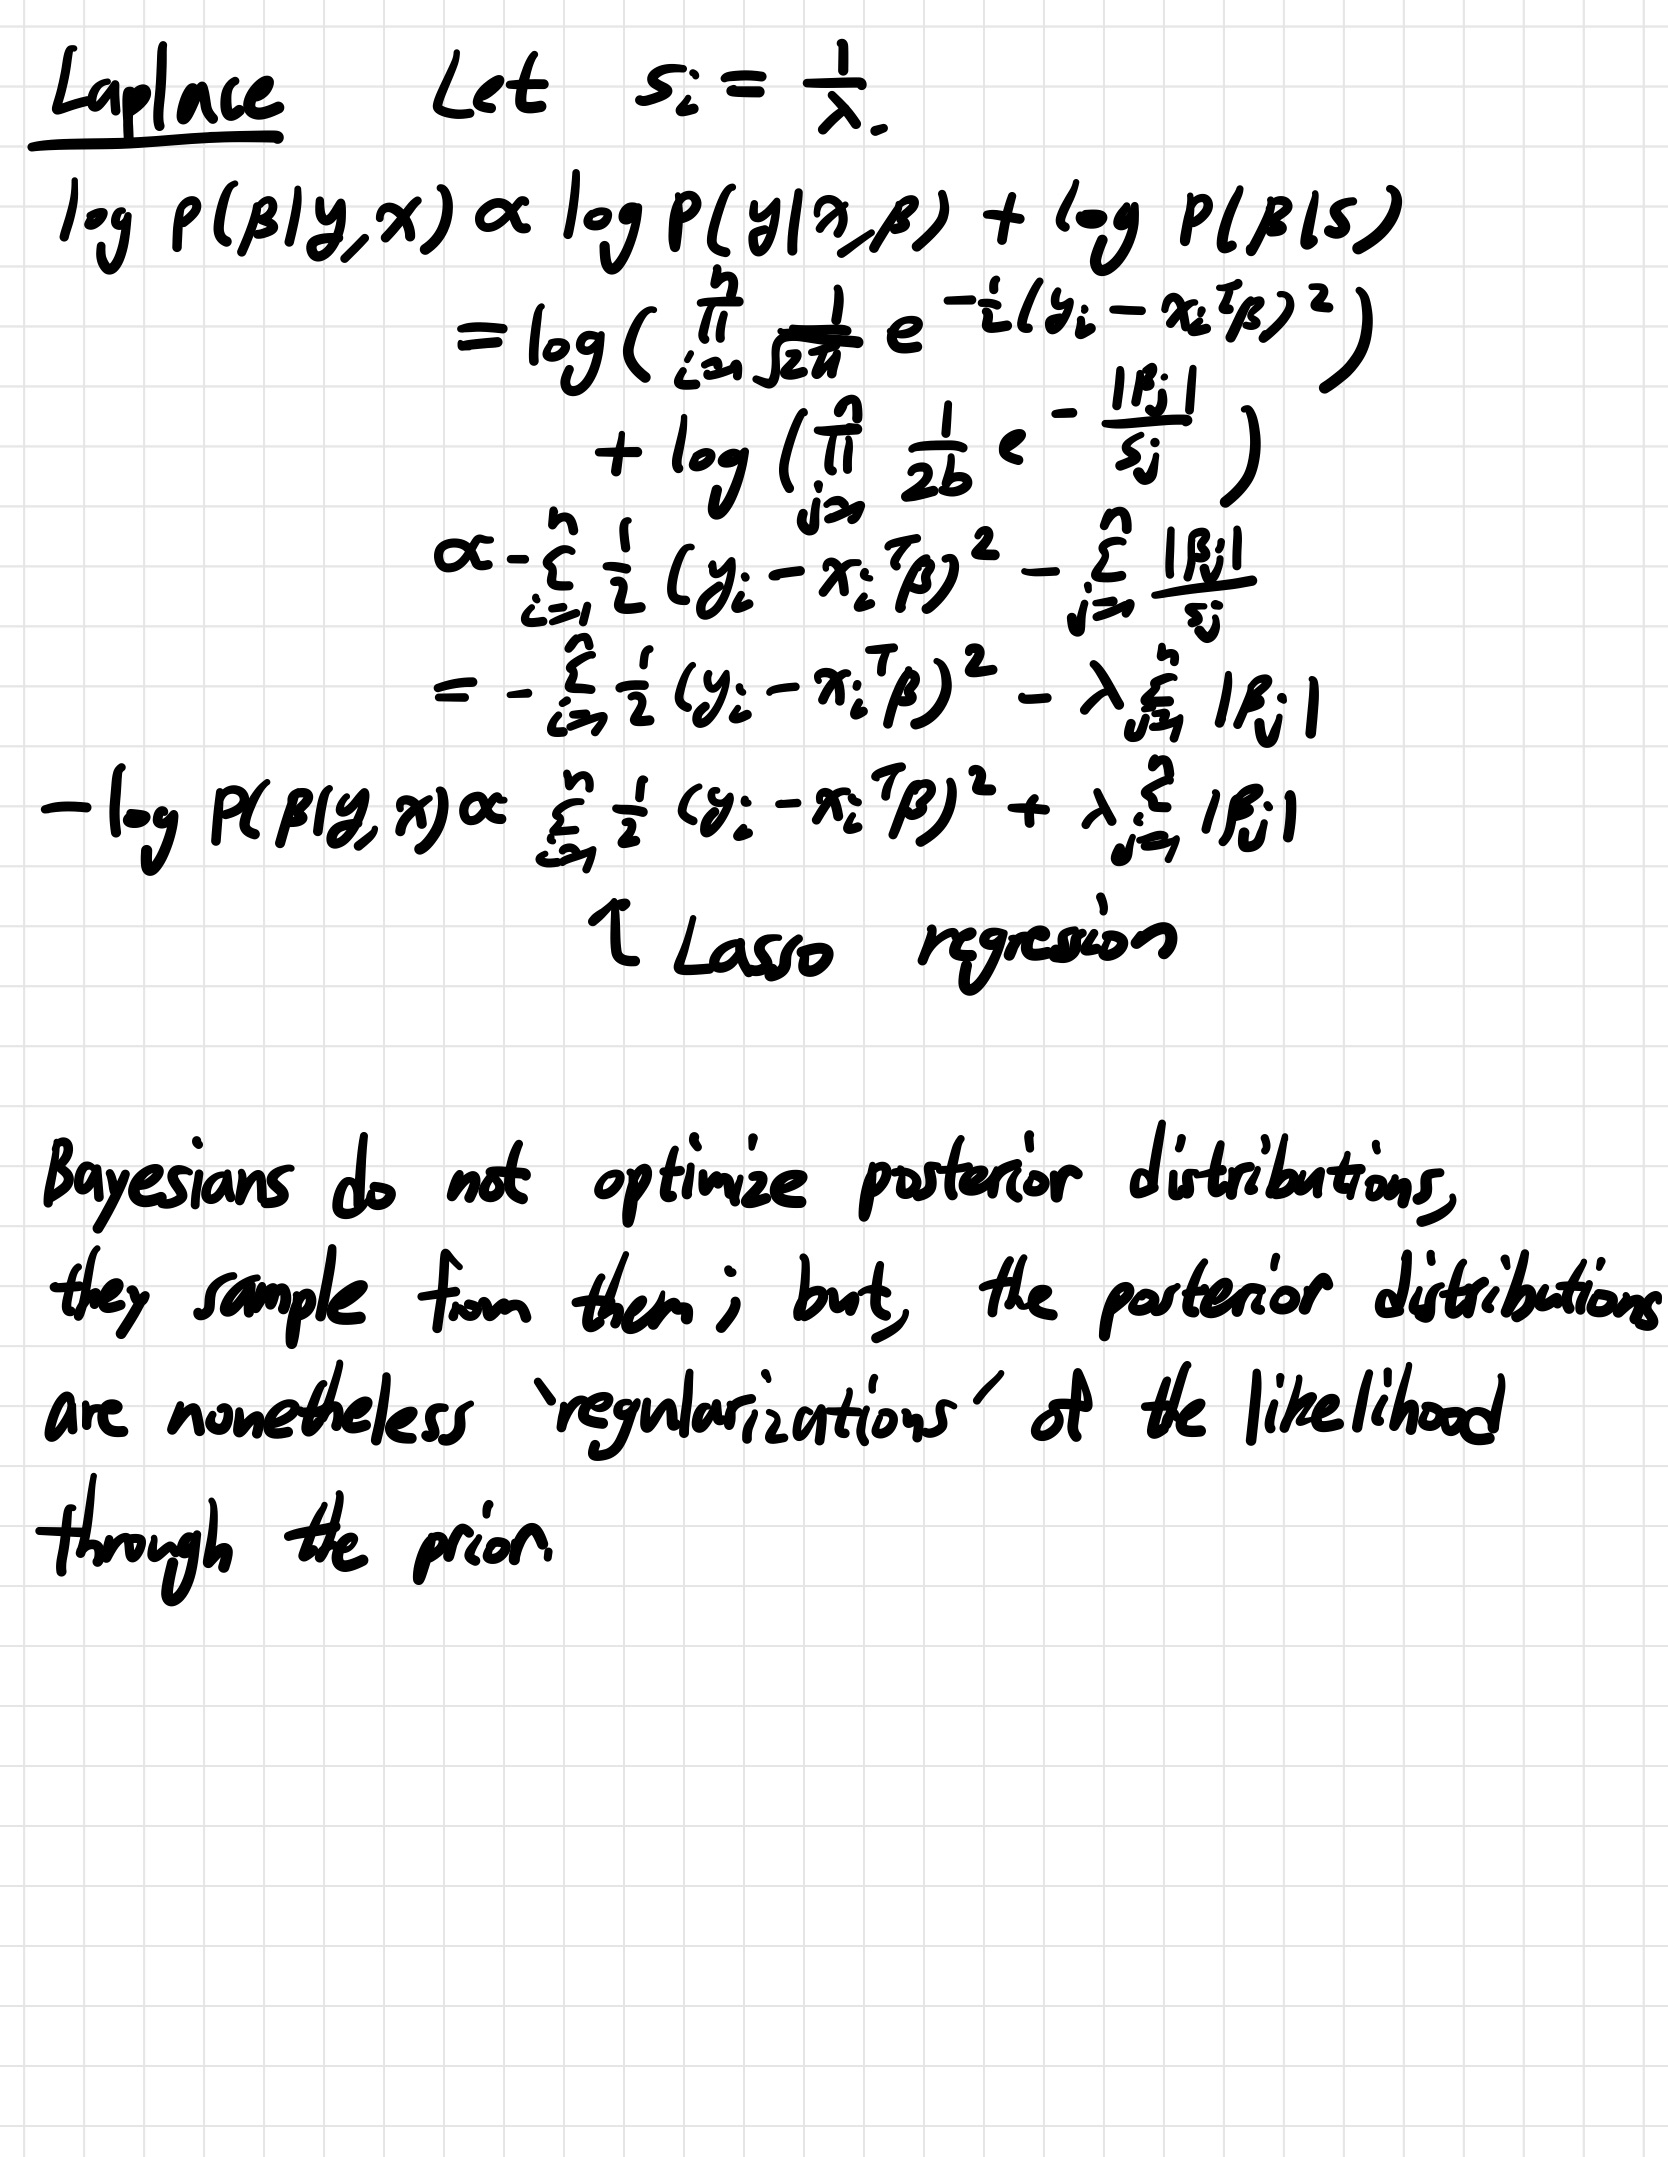